# 贝叶斯

### 贝叶斯公式

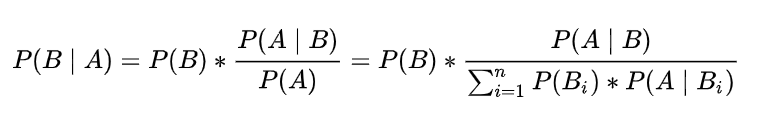

### 后验概率 = 先验概率 * 似然估计

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import brier_score_loss as BS
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# 导入自己写的工具类
from my_tools import *
# 忽略warning
import warnings
warnings.filterwarnings("ignore")

### 加载数据

In [2]:
jibing_res = pd.read_excel("./jibing_feature_res_final.xlsx")
jibing = pd.read_excel("./jibing_feature_final.xlsx")

In [3]:
clf = GaussianNB()
Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing,jibing_res,test_size=0.3)
clf.fit(Xtrain, Ytrain)
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre,"贝叶斯")

#######################贝叶斯########################
+--------------------+--------------------+--------------------+
|     precision      |       recall       |         f1         |
+--------------------+--------------------+--------------------+
| 0.8572650775775776 | 0.9850746268656716 | 0.9167365544834742 |
+--------------------+--------------------+--------------------+


### 按照高斯贝叶斯的原理，将样本标准化
### 并且解决样本不均衡的问题

In [4]:
col = jibing.columns.tolist()
col = col[10:59]
col.append("年龄")
sampler = RandomOverSampler(sampling_strategy=1, random_state=42)
Xtrain, Ytrain = sampler.fit_resample(Xtrain,Ytrain)

### 归一化


In [5]:
jibing = guiyihua(jibing)

### 标准化

In [6]:
jibing = biaozhunhua(jibing)

In [7]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing,jibing_res,test_size=0.3)

In [8]:
jibing.head()

,左右,是否外伤,症状持续时间,明显夜间痛,年龄,高血压,高血脂,2型糖尿病,吸烟与否,饮酒与否,...,腺苷脱氨酶ADA,果糖胺,肌酸激酶,α-L-盐藻糖苷酶,乳酸,淀粉酶,同型半胱氨酸,铁,总铁结合力,血型
0,0,0,3,0,0.402864,1,0,0,0,-0.448892,...,-0.396787,-0.160764,-0.176406,-1.241122,0.269307,-0.755958,-0.420427,-0.880622,-1.226099,3
1,1,1,2,0,0.180258,1,0,0,0,-0.448892,...,-0.396787,-0.079732,-0.098498,-0.773740,-0.390723,0.608493,-0.538745,-0.132586,0.088761,0
2,1,0,4,1,-0.339156,0,0,0,0,-0.448892,...,1.055008,-0.035743,-0.095811,-0.072667,0.269307,0.949606,-0.420427,-1.742489,-0.360483,0
3,1,0,3,0,0.031854,0,0,0,0,-0.448892,...,1.345367,-0.077417,-0.058200,-1.241122,-0.390723,0.096824,-0.521842,-0.311464,-0.185168,0
4,0,1,3,0,0.106056,0,0,0,0,-0.448892,...,0.474290,-0.095938,-0.149541,-1.007431,0.005295,3.678509,-0.724673,-0.734267,-0.963127,0


In [9]:
clf = GaussianNB()
clf = clf.fit(Xtrain,Ytrain)
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre,"高斯朴素贝叶斯")

#####################高斯朴素贝叶斯######################
+--------------------+--------------------+--------------------+
|     precision      |       recall       |         f1         |
+--------------------+--------------------+--------------------+
| 0.7810734153125458 | 0.9054054054054054 | 0.8386563573225105 |
+--------------------+--------------------+--------------------+


### 多项式贝叶斯

### 由于多项式贝叶斯中样本不能为负数，所以要重新加载数据
### 只进行归一化

In [11]:
jibing_res = pd.read_excel("./jibing_feature_res_final.xlsx")
jibing = pd.read_excel("./jibing_feature_final.xlsx")
jibing = guiyihua(jibing)
col = jibing.columns.tolist()
col = col[10:59]
col.append("年龄")
sampler = RandomOverSampler(sampling_strategy=1, random_state=42)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing,jibing_res,test_size=0.3)
Xtrain, Ytrain = sampler.fit_resample(jibing,jibing_res)

In [12]:
clf = MultinomialNB()
clf.fit(Xtrain, Ytrain)
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre,"多项式朴素贝叶斯")

#####################多项式朴素贝叶斯#####################
+--------------------+--------+-------------------+
|     precision      | recall |         f1        |
+--------------------+--------+-------------------+
| 0.7861635385297756 |  0.5   | 0.611246948757734 |
+--------------------+--------+-------------------+


### 分箱

In [17]:
jibing_res = pd.read_excel("./jibing_feature_res_final.xlsx")
jibing = pd.read_excel("./jibing_feature_final.xlsx")
col = jibing.columns.tolist()
col = col[10:59]
col.append("年龄")
est = KBinsDiscretizer(n_bins=67, encode='ordinal', strategy="kmeans")
est.fit(jibing[col])
jibing[col] = est.transform(jibing[col])

In [18]:
clf = MultinomialNB()
sampler = RandomOverSampler(sampling_strategy=1, random_state=42)
jibing, jibing_res = sampler.fit_resample(jibing,jibing_res)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing,jibing_res,test_size=0.3)
clf.fit(Xtrain, Ytrain)
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre,"分箱的多项式朴素贝叶斯")

###################分箱的多项式朴素贝叶斯####################
+--------------------+--------------------+--------------------+
|     precision      |       recall       |         f1         |
+--------------------+--------------------+--------------------+
| 0.5720988942905088 | 0.5259433962264151 | 0.5480510869920623 |
+--------------------+--------------------+--------------------+


### f1-score 到了0.6

### 伯努利朴素贝叶斯

#### 伯努利贝叶斯分类器中，指定各个特征是独立的，没有相互关联。
#### 这里考虑到疾病的理化指标不可能是相互独立的，所以这种方法不适用。

### ComplementNB 互补朴素贝叶斯

In [46]:
jibing_res = pd.read_excel("./jibing_feature_res_final.xlsx")
jibing = pd.read_excel("./jibing_feature_final.xlsx")
col = jibing.columns.tolist()
col = col[10:59]
col.append("年龄")
est = KBinsDiscretizer(n_bins=67, encode='ordinal', strategy="kmeans")
est.fit(jibing[col])
jibing[col] = est.transform(jibing[col])
sampler = RandomOverSampler(sampling_strategy=1, random_state=42)
jibing, jibing_res = sampler.fit_resample(jibing,jibing_res)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing,jibing_res,test_size=0.3)

In [47]:
clf = ComplementNB()
param_grid = {'alpha': np.linspace(0,1,20), 'fit_prior': [True, False]}
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(Xtrain, Ytrain)

GridSearchCV(cv=5, estimator=ComplementNB(),
             param_grid={'alpha': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'fit_prior': [True, False]})

In [48]:
grid_search.best_params_

{'alpha': 0.0, 'fit_prior': True}

In [49]:
clf = ComplementNB(alpha=0,fit_prior=True)
clf.fit(Xtrain, Ytrain)
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre,"互补朴素贝叶斯")

#####################互补朴素贝叶斯######################
+--------------------+--------------------+--------------------+
|     precision      |       recall       |         f1         |
+--------------------+--------------------+--------------------+
| 0.6068796068796068 | 0.6009732360097324 | 0.6039119804400979 |
+--------------------+--------------------+--------------------+


### 徘徊在 0.59-0.61 之间